In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.layers import InputSpec
from tensorflow.python.keras.utils import conv_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from give_a_model import srcnn
from scipy.io import loadmat

batch_size = 8
model = srcnn(batch_size=batch_size)
model.summary()
model.output_shape
model.load_weights('./my_weights/srcnn')

kg_f = np.load('/scratch/lllei/inf1050_loc240/200040/kg_f_5y.npy')
kg_f = kg_f[2343,:,:]

2022-01-11 16:05:12.301984: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-11 16:05:12.420788: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:5a:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-01-11 16:05:12.421396: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:b5:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-01-11 16:05:12.421944: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:c1:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2

Static-shape before: (None, 481)
Static-shape after: (None, 481)
Static-shape before: (None, 960, 240)
Static-shape after: (None, 960, 240)
Model: "custom_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
kg_raw (InputLayer)             [(None, 960, 240, 1) 0                                            
__________________________________________________________________________________________________
periodic_padding2d (PeriodicPad (None, 974, 248, 1)  0           kg_raw[0][0]                     
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 966, 246, 128 3584        periodic_padding2d[0][0]         
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 964, 24

In [2]:
kg_f = np.reshape(kg_f, [1,960,240,1])
np.shape(kg_f)

(1, 960, 240, 1)

### 1. Feature Maps

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
kg_raw (InputLayer)          [(None, 960, 240, 1)]     0         
_________________________________________________________________
periodic_padding2d (Periodic (None, 974, 248, 1)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>


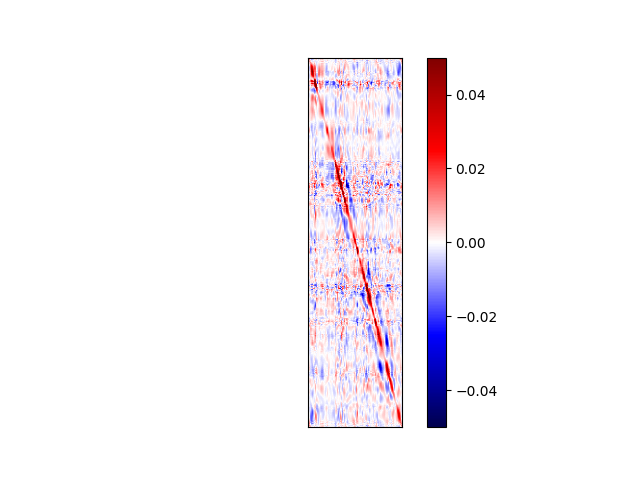

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors


cnn = keras.Model(inputs=model.inputs, outputs=model.layers[1].output)
cnn.summary()
feature_maps = cnn.predict(kg_f)

width = 1
height = 1
ix = 1
images = []
for _ in range(width):
    for _ in range(height):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        images.append(ax.imshow(feature_maps[0, :, :, ix-1], cmap=plt.cm.seismic))
        ix += 1

# vmin = min(image.get_array().min() for image in images)
# vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=-0.05, vmax=0.05)
for im in images:
    im.set_norm(norm)    
plt.colorbar(images[0], orientation='vertical', fraction=.3)        
# show the figure
plt.show()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
kg_raw (InputLayer)          [(None, 960, 240, 1)]     0         
_________________________________________________________________
periodic_padding2d (Periodic (None, 974, 248, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 966, 246, 128)     3584      
Total params: 3,584
Trainable params: 3,584
Non-trainable params: 0
_________________________________________________________________


2022-01-11 16:05:30.699887: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-01-11 16:05:32.010315: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


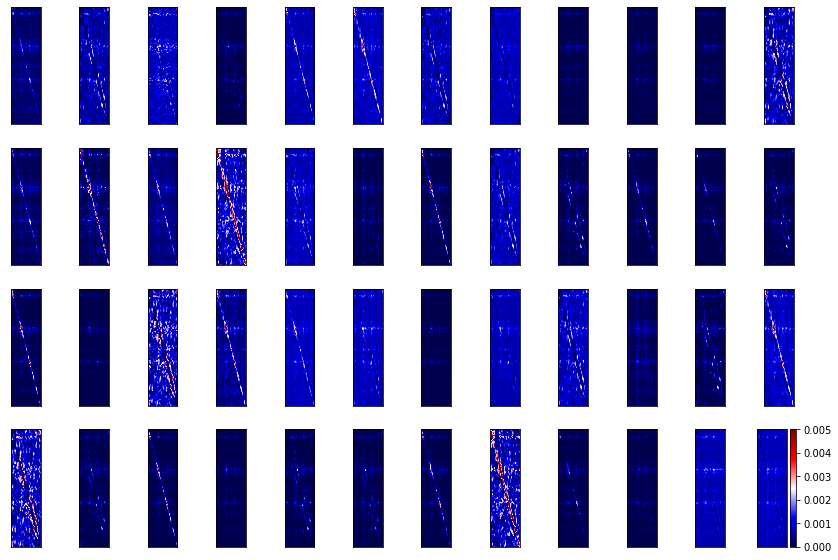

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors


cnn = keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
cnn.summary()
feature_maps = cnn.predict(kg_f)

width = 12
height = 4
ix = 1
images = []
for _ in range(width):
    for _ in range(height):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        images.append(ax.imshow(feature_maps[0, :, :, ix-1], cmap=plt.cm.seismic))
        ix += 1

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=0.005)
for im in images:
    im.set_norm(norm)    
plt.colorbar(images[0], orientation='vertical', fraction=.3)        
plt.subplots_adjust(top=2,right=2)# show the figure

# show the figure
plt.show()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
kg_raw (InputLayer)          [(None, 960, 240, 1)]     0         
_________________________________________________________________
periodic_padding2d (Periodic (None, 974, 248, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 966, 246, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 964, 244, 64)      73792     
Total params: 77,376
Trainable params: 77,376
Non-trainable params: 0
_________________________________________________________________


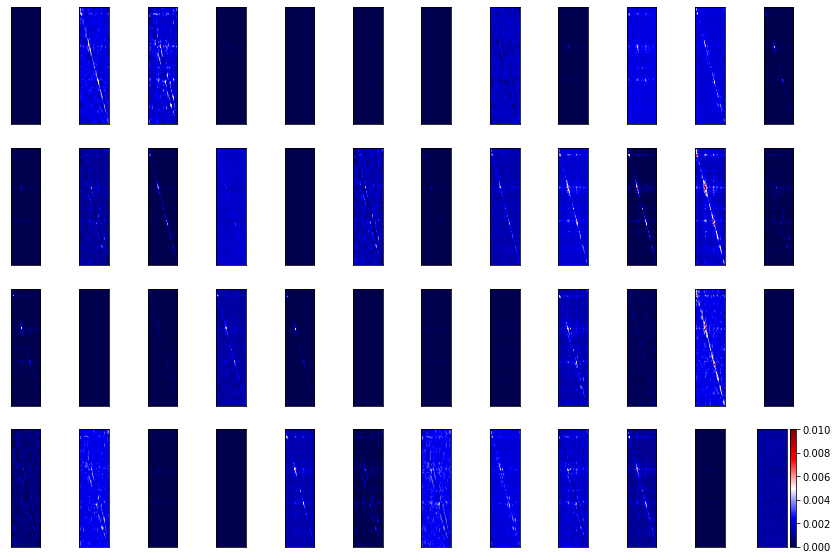

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors


cnn = keras.Model(inputs=model.inputs, outputs=model.layers[3].output)
cnn.summary()
feature_maps = cnn.predict(kg_f)

width = 12
height = 4
ix = 1
images = []
for _ in range(width):
    for _ in range(height):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        images.append(ax.imshow(feature_maps[0, :, :, ix-1], cmap=plt.cm.seismic))
        ix += 1

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=0.01)
for im in images:
    im.set_norm(norm)    
plt.colorbar(images[0], orientation='vertical', fraction=.3)        
plt.subplots_adjust(top=2,right=2)# show the figure

# show the figure
plt.show()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
kg_raw (InputLayer)          [(None, 960, 240, 1)]     0         
_________________________________________________________________
periodic_padding2d (Periodic (None, 974, 248, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 966, 246, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 964, 244, 64)      73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 960, 240, 1)       1601      
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
loc_f (Dense)                (None, 481)               1108

<IPython.core.display.Javascript object>


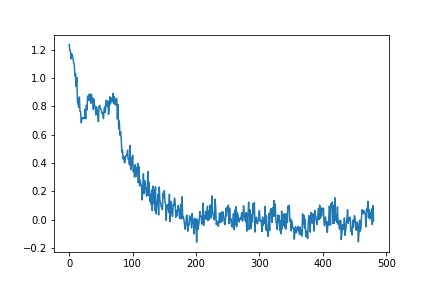

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors


cnn = keras.Model(inputs=model.inputs, outputs=model.layers[6].output)
cnn.summary()
feature_maps = cnn.predict(kg_f)

width = 1
height = 1
ix = 1
images = []
for _ in range(width):
    for _ in range(height):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        # plot filter channel in grayscale
        ax.plot(feature_maps[0,:])

# show the figure
plt.show()

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors


cnn = keras.Model(inputs=model.inputs, outputs=model.layers[7].output)
cnn.summary()
feature_maps = cnn.predict(kg_f)

width = 1
height = 1
ix = 1
images = []
for _ in range(width):
    for _ in range(height):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        images.append(ax.imshow(feature_maps[0, :, :], cmap=plt.cm.seismic))
        ix += 1

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=-0.04, vmax=0.04)
for im in images:
    im.set_norm(norm)    
plt.colorbar(images[0], orientation='vertical', fraction=.3)        
# show the figure
plt.show()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
kg_raw (InputLayer)             [(None, 960, 240, 1) 0                                            
__________________________________________________________________________________________________
periodic_padding2d (PeriodicPad (None, 974, 248, 1)  0           kg_raw[0][0]                     
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 966, 246, 128 3584        periodic_padding2d[0][0]         
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 964, 244, 64) 73792       conv2d[0][0]                     
____________________________________________________________________________________________

<IPython.core.display.Javascript object>

In [10]:
import numpy as np


kg_t = np.load('/scratch/lllei/inf1050_loc240/200040/kg_t_5y.npy')
kg_t = kg_t[2343,:,:]

kg_ff = np.reshape(kg_f, [960,240])

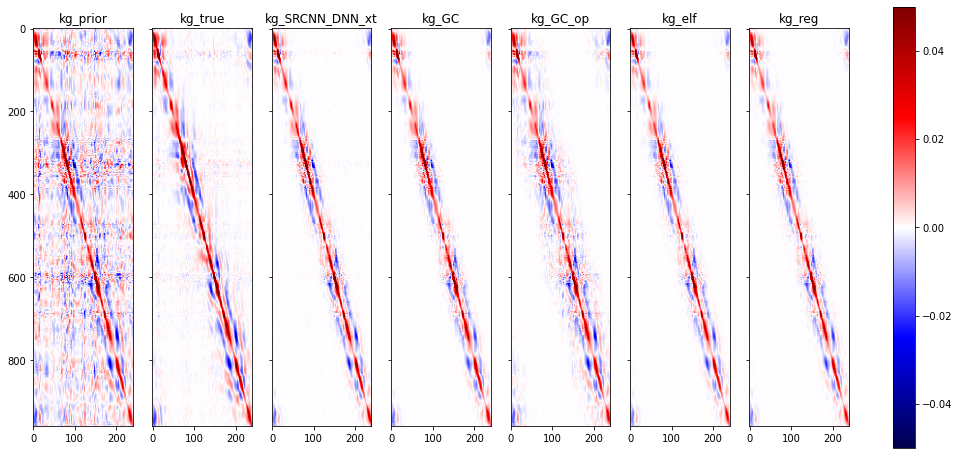

In [30]:
%matplotlib inline
import sys 
sys.path.append('/home/lllei/AI_localization/L05/git_repo/general')
import matplotlib.pyplot as plt
from matplotlib import colors
from construct_GC_2d import construct_GC_2d
from construct_func_2d import construct_func_2d


model_size = 960 
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
gc = construct_GC_2d(240, 960, obs_grids)
gc_mat = np.transpose(gc)
gc_op = construct_GC_2d(450, 960, obs_grids)
gc_mat_op = np.transpose(gc_op)

# localize_inde_func = np.load('/home/lllei/AI_localization/L05/1y/server/e2000_inf1050_e40_inf1050_loc240/train/reg/reg_loc_beta.npy')
# localize_inde_eps = np.load('/home/lllei/AI_localization/L05/1y/server/e2000_inf1050_e40_inf1050_loc240/train/reg/reg_loc_eps.npy')
# CMat_inde = np.mat(construct_func_2d(localize_inde_func, model_size, obs_grids))
# eps_inde = np.mat(construct_func_2d(localize_inde_eps, model_size, obs_grids))
# reg_mat = np.array(np.transpose(CMat_inde))
# eps_reg = np.array(np.transpose(eps_inde))
elff = np.load('/home/lllei/AI_localization/L05/e2000_inf1050_e40_inf1050_loc240/train/elf/distance_only/debug_481/elf_ztest.npy')
elff = np.concatenate((elff,elff[-2:0:-1]), axis=0)
elf = np.transpose(construct_func_2d(elff, model_size, obs_grids))
regg = np.load('/home/lllei/AI_localization/L05/e2000_inf1050_e40_inf1050_loc240/train/reg/debug_481/without_res/reg_loc_beta.npy')
reg = np.concatenate((regg,regg[-2:0:-1]), axis=0)
reg = np.transpose(construct_func_2d(elff, model_size, obs_grids))

images = []
fig, axs = plt.subplots(1, 7, sharey=True)
axs[0].set_title('kg_prior')
images.append(axs[0].imshow(kg_ff, cmap=plt.cm.seismic))

axs[1].set_title('kg_true')
images.append(axs[1].imshow(kg_t, cmap=plt.cm.seismic))

axs[2].set_title('kg_SRCNN_DNN_xt')
images.append(axs[2].imshow(feature_maps[0,:,:], cmap=plt.cm.seismic))

axs[3].set_title('kg_GC')
images.append(axs[3].imshow(kg_ff*gc_mat, cmap=plt.cm.seismic))

axs[4].set_title('kg_GC_op')
images.append(axs[4].imshow(kg_ff*gc_mat_op, cmap=plt.cm.seismic))

# axs[4].set_title('kg_reg')
# images.append(axs[4].imshow(kg_ff*reg_mat + eps_reg, cmap=plt.cm.seismic))

axs[5].set_title('kg_elf')
images.append(axs[5].imshow(kg_ff*elf, cmap=plt.cm.seismic))

axs[6].set_title('kg_reg')
images.append(axs[6].imshow(kg_ff*reg, cmap=plt.cm.seismic))

plt.subplots_adjust(bottom=0.1, right=1, top=0.9)

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=-0.05, vmax=0.05)
for im in images:
    im.set_norm(norm)
    
fig.colorbar(images[0], ax=axs, orientation='vertical', fraction=.025)
fig.set_size_inches(14,8)

# plt.savefig('kg.png')
plt.show()


### loc_func_2D

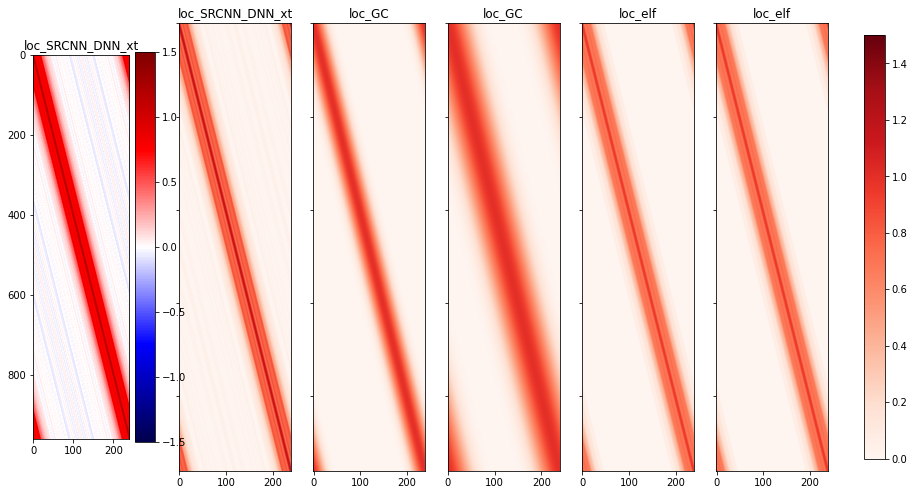

In [59]:
%matplotlib inline
import sys 
sys.path.append('/home/lllei/AI_localization/L05/git_repo/general')
import matplotlib.pyplot as plt
from matplotlib import colors
from construct_GC_2d import construct_GC_2d
from construct_func_2d import construct_func_2d


model_size = 960 
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]

gc = construct_GC_2d(240, 960, obs_grids)
gc_mat = np.transpose(gc)
gc_op = construct_GC_2d(450, 960, obs_grids)
gc_mat_op = np.transpose(gc_op)

elff = np.load('/home/lllei/AI_localization/L05/e2000_inf1050_e40_inf1050_loc240/train/elf/distance_only/debug_481/elf_ztest.npy')
elff = np.concatenate((elff,elff[-2:0:-1]), axis=0)
elf = np.transpose(construct_func_2d(elff, model_size, obs_grids))
regg = np.load('/home/lllei/AI_localization/L05/e2000_inf1050_e40_inf1050_loc240/train/reg/debug_481/without_res/reg_loc_beta.npy')
reg = np.concatenate((regg,regg[-2:0:-1]), axis=0)
reg = np.transpose(construct_func_2d(elff, model_size, obs_grids))
   
images = []
fig, axs = plt.subplots(1, 6, sharey=True)
axs[0].set_title('loc_SRCNN_DNN_xt')
images.append(axs[0].imshow(feature_maps[0,:,:] / kg_ff, cmap=plt.cm.seismic, clim=(-1.5, 1.5)))

# axs[1].set_title('loc_kg_t')
# images.append(axs[1].imshow(kg_t / kg_ff, cmap=plt.cm.seismic, clim=(-1.5, 1.5)))

axs[1].set_title('loc_SRCNN_DNN_xt')
images.append(axs[1].imshow(feature_maps[0,:,:] / kg_ff, cmap=plt.cm.Reds, clim=(0, 1.5)))
# fig.colorbar(images[1], ax=axs[1], orientation='vertical', fraction=.18)

axs[2].set_title('loc_GC')
images.append(axs[2].imshow(gc_mat, cmap=plt.cm.Reds, clim=(0, 1.5)))

axs[3].set_title('loc_GC')
images.append(axs[3].imshow(gc_mat_op, cmap=plt.cm.Reds, clim=(0, 1.5)))

axs[4].set_title('loc_elf')
images.append(axs[4].imshow(elf, cmap=plt.cm.Reds, clim=(0, 1.5)))

axs[5].set_title('loc_elf')
images.append(axs[5].imshow(elf, cmap=plt.cm.Reds, clim=(0, 1.5)))

plt.subplots_adjust(bottom=0.1, right=0.97, top=0.9)
fig.colorbar(images[0], ax=axs[0], orientation='vertical', fraction=.16)
fig.colorbar(images[5], ax=axs[1:], orientation='vertical', fraction=.03)

fig.set_size_inches(14,8)

plt.savefig('loc.png')
plt.show()

### loc_func_1D

<IPython.core.display.Javascript object>


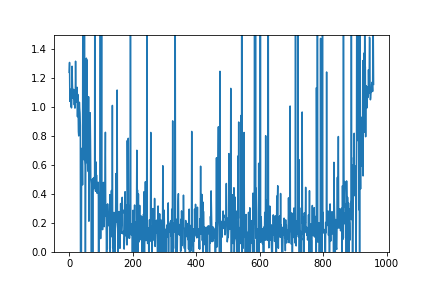

(0.0, 1.5)

In [14]:
loc = feature_maps[0,:,:,0] / kg_ff
obs_dens = 4
for j in range(240):
    loc[:,j] = np.roll(loc[:,j], -(obs_dens * j + obs_dens - 1), axis=0)
loc_mean = np.mean(loc, axis=1)
plt.plot(range(960), loc_mean)
plt.ylim((0,1.5))

<IPython.core.display.Javascript object>


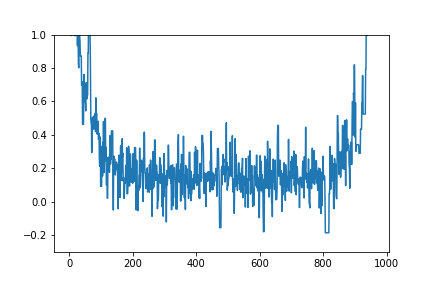

(-0.3, 1.0)

In [15]:
filterLim = 0.3
for i in range(959):
    if abs(loc_mean[i+1] - loc_mean[i]) > filterLim:
        loc_mean[i+1] = loc_mean[i]
plt.plot(range(960), loc_mean)
plt.ylim((-0.3,1))

### The prior MSE

In [3]:
import numpy as np


mse_reg = np.load('/home/lllei/AI_localization/L05/1y/server/e2000_inf1050_e40_inf1050_loc240/train/reg/mse_reg_1.npy')
np.mean(mse_reg)

1.0329690045368985e-05